In [1]:
#jk

In [2]:
import os
ROOT = "/content/drive/MyDrive/Colab Notebooks"
os.chdir(ROOT)

In [3]:
!pwd

/content/drive/MyDrive/Colab Notebooks


In [4]:
!ls

 demo_df_keras.ipynb	  dog_cat_classification   pytorch_basics.ipynb
 demo_pytorch_CNN.ipynb   FashionMNISTDir	  'Untitled folder'


In [53]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import transforms, datasets
import torch.nn.functional as F
from sklearn.metrics import confusion_matrix
from tqdm import tqdm

In [6]:
class Config:
  def __init__(self):
    self.ROOT_DATA_DIR = "FashionMNISTDir"
    self.EPOCH = 10
    self.BATCH_SIZE = 32
    self.LEARNING_RATE = 0.01
    self.IMAGE_SIZE = (28, 28)
    self.DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
    print(f"this notebook is using device: {self.DEVICE}")
    self.SEED = 2022

config = Config()

this notebook is using device: cuda


In [7]:
train_data = datasets.FashionMNIST(
    root = config.ROOT_DATA_DIR,
    train = True,
    download = True,
    transform = transforms.ToTensor()
)

test_data = datasets.FashionMNIST(
    root = config.ROOT_DATA_DIR,
    train = False,
    download = True,
    transform = transforms.ToTensor()
)

In [8]:
train_data.data.shape

torch.Size([60000, 28, 28])

In [9]:
test_data.data.shape

torch.Size([10000, 28, 28])

In [10]:
train_data.class_to_idx

{'Ankle boot': 9,
 'Bag': 8,
 'Coat': 4,
 'Dress': 3,
 'Pullover': 2,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'T-shirt/top': 0,
 'Trouser': 1}

In [11]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [12]:
given_label_map = train_data.class_to_idx
given_label_map

{'Ankle boot': 9,
 'Bag': 8,
 'Coat': 4,
 'Dress': 3,
 'Pullover': 2,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'T-shirt/top': 0,
 'Trouser': 1}

In [13]:
label_map = {val: key for key, val in given_label_map.items()}
label_map

{0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

##Visualize one of the samples

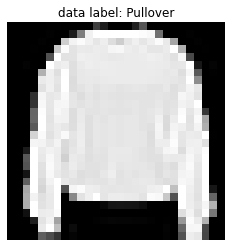

In [14]:
def view_sample_img(data, idx, label_map):
  plt.imshow(data.data[idx], cmap="gray")
  plt.title(f"data label: {label_map[data.targets[idx].item()]}")
  plt.axis("off")

view_sample_img(train_data, 7, label_map)

## Create the dataloader

In [15]:
train_data_loader = DataLoader(
    dataset = train_data,
    batch_size = config.BATCH_SIZE,
    shuffle = True
)

test_data_loader = DataLoader(
    dataset = test_data,
    batch_size = config.BATCH_SIZE,
    shuffle = False
)

In [16]:
train_data_loader

In [17]:
for images, labels in train_data_loader:
  print(images.shape)
  print(labels.shape)
  break

torch.Size([32, 1, 28, 28])
torch.Size([32])


In [18]:
images[0].shape

torch.Size([1, 28, 28])

In [19]:
images[0].squeeze().shape

torch.Size([28, 28])

In [20]:
images[0].squeeze().numpy()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.1254902 , 0.4745098 , 0.64705884,
        0.5529412 , 0.4745098 , 0.        , 0.        , 0.        ,
        0.        , 0.00392157, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.04313726,
        0.20392157, 0.34901962, 0.2       , 0.42745098, 0.7607843 ,
        0.3372549 , 0.3137255 , 0.36862746, 0.20392157, 0.04313726,
        0.        , 0.        , 0.01176471, 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.16862746, 0.38039216,
        0.28235295, 0.15686275, 0.34509805, 0.34901962, 0.14901961,
        0.28235295, 0.3882

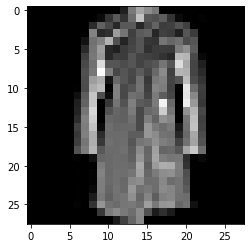

In [21]:
plt.imshow(images[0].squeeze(), cmap="gray")

In [22]:
images[0].shape, images[0].squeeze().shape, images[0].unsqueeze(dim=1).shape

(torch.Size([1, 28, 28]), torch.Size([28, 28]), torch.Size([1, 1, 28, 28]))

In [23]:
images[0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.1255, 0.4745, 0.6471, 0.5529,
          0.4745, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0431, 0.2039, 0.3490, 0.2000, 0.4275, 0.7608, 0.3373,
          0.3137, 0.3686, 0.2039, 0.0431, 0.0000, 0.0000, 0.0118, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.1686, 0.3804, 0.2824, 0.1569, 0.3451, 0.3490, 0.1490, 0.2824,
          0.3882, 0.2353, 0.2510, 0.3255, 0.2510, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.5137, 0.1608, 0.1882, 0.6157, 0.4588, 0.2510, 0.3569, 0.3804,
          0.1490, 0.2510, 0.2314, 0.1255, 0.3373, 0.2314,

In [24]:
images[0][0].shape

torch.Size([28, 28])

In [25]:
images[0].squeeze()

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.1255, 0.4745, 0.6471, 0.5529, 0.4745, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0431, 0.2039, 0.3490, 0.2000, 0.4275, 0.7608, 0.3373, 0.3137, 0.3686,
         0.2039, 0.0431, 0.0000, 0.0000, 0.0118, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1686,
         0.3804, 0.2824, 0.1569, 0.3451, 0.3490, 0.1490, 0.2824, 0.3882, 0.2353,
         0.2510, 0.3255, 0.2510, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.5137,
         0.1608, 0.1882, 0.6157, 0.4588, 0.2510, 0.3569, 0.3804, 0.1490, 0.2510,
         0.2314, 0.1255, 0.3373, 0.2314, 0.0000, 0.0000

In [26]:
images[0].unsqueeze(dim=1)

tensor([[[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.1255, 0.4745, 0.6471, 0.5529,
           0.4745, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0431, 0.2039, 0.3490, 0.2000, 0.4275, 0.7608, 0.3373,
           0.3137, 0.3686, 0.2039, 0.0431, 0.0000, 0.0000, 0.0118, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.1686, 0.3804, 0.2824, 0.1569, 0.3451, 0.3490, 0.1490, 0.2824,
           0.3882, 0.2353, 0.2510, 0.3255, 0.2510, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.5137, 0.1608, 0.1882, 0.6157, 0.4588, 0.2510, 0.3569, 0.3804,
           0.1490, 0.2510, 0.2314, 0.1255, 

In [42]:
# refer handwritten notebook for more details

class CNN(nn.Module):
  def __init__(self, in_, out_):
    super(CNN, self).__init__()

    # out_channels -> no.of filters/ expected no.of fetaure maps
    self.conv_pool_01 = nn.Sequential(
        nn.Conv2d(in_channels=in_, out_channels=8, kernel_size=5, stride=1, padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )
    # in_channels -> previous layer ouput feature maps
    self.conv_pool_02 = nn.Sequential(
        nn.Conv2d(in_channels=8, out_channels=16, kernel_size=5, stride=1, padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )

    self.Flatten = nn.Flatten()
    # linear -> Dense
    # FC -> fully connected layer
    self.FC_01 = nn.Linear(in_features=16*4*4, out_features=128)
    self.FC_02 = nn.Linear(in_features=128, out_features=64)
    self.FC_03 = nn.Linear(in_features=64, out_features=out_)



  def forward(self, x):
    x = self.conv_pool_01(x)
    x = self.conv_pool_02(x)
    x = self.Flatten(x)
    x = self.FC_01(x)
    x = F.relu(x)
    x = self.FC_02(x)
    x = F.relu(x)    
    x = self.FC_03(x)
    return x

In [43]:
model = CNN(1, 10)  # CNN(input_channel, output_target_values)

print(model)

CNN(
  (conv_pool_01): Sequential(
    (0): Conv2d(1, 8, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_pool_02): Sequential(
    (0): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (Flatten): Flatten(start_dim=1, end_dim=-1)
  (FC_01): Linear(in_features=256, out_features=128, bias=True)
  (FC_02): Linear(in_features=128, out_features=64, bias=True)
  (FC_03): Linear(in_features=64, out_features=10, bias=True)
)


In [45]:
model.Flatten

Flatten(start_dim=1, end_dim=-1)

In [46]:
model.conv_pool_02

Sequential(
  (0): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)

In [47]:
model.FC_01

Linear(in_features=256, out_features=128, bias=True)

In [49]:
model.parameters()

<generator object Module.parameters at 0x7f70cba73050>

In [48]:
# verify model is using CUDA or not
next(model.parameters()).is_cuda

False

In [50]:
# to make model to use CUDA
model.to(config.DEVICE)

CNN(
  (conv_pool_01): Sequential(
    (0): Conv2d(1, 8, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_pool_02): Sequential(
    (0): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (Flatten): Flatten(start_dim=1, end_dim=-1)
  (FC_01): Linear(in_features=256, out_features=128, bias=True)
  (FC_02): Linear(in_features=128, out_features=64, bias=True)
  (FC_03): Linear(in_features=64, out_features=10, bias=True)
)

In [51]:
# now verify after making model to use CUDA.. means it will use GPU
next(model.parameters()).is_cuda

True

## Count the no. of trainable parameters

In [54]:
def count_params(model):
  model_params = {"Modules": list(), "Parameters": list()}
  total = {"trainable": 0, "non_trainable": 0} 
  for name, parameters in model.named_parameters():
    param = parameters.numel()
    if not parameters.requires_grad:
      total["non_trainable"] += param
      continue
    model_params["Modules"].append(name)
    model_params["Parameters"].append(param)
    total["trainable"] += param
  df = pd.DataFrame(model_params)
  df = df.style.set_caption(f"Total parameters: {total}")
  return df

count_params(model)

,Modules,Parameters
0,conv_pool_01.0.weight,200
1,conv_pool_01.0.bias,8
2,conv_pool_02.0.weight,3200
3,conv_pool_02.0.bias,16
4,FC_01.weight,32768
5,FC_01.bias,128
6,FC_02.weight,8192
7,FC_02.bias,64
8,FC_03.weight,640
9,FC_03.bias,10


## Training loop

## Evaluate our model

## prediction on our model